# Vorticity field reconstruction using 2 different models

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import torch as th
import random

from utils import *
from models import *

import cmocean as cmo       #optional, this module is for plotting with nice colors.If you do not have it, put this part into 
colormap='cmo.balance'      #comment and run the line below (colormap='coolwarm')
#colormap='coolwarm'

#Load data
Data = np.load('flow_cylinder.npy');
(n,m,l)=Data.shape

#General parameters
Training_size=120 #Number of examples for training
n_sensors=5 #number of sensors
random_seed=random.randint(1,1000) #random seed for sensors position generation

#Training parameters
minibatch_size=30
learning_rate = 1e-3
weight_decay = 1e-4
nepochs=3000 #Duration of trainig in epochs

#Choosing sensors positions
Sensors_coordinates=random_sensors_positionning(n_sensors,random_seed)

#Data separation into training and validation set, reshaping and normalising
Input_training, Input_validation, Training_set, Validation_set, Norm=data_treatment(Data, Training_size, Sensors_coordinates)

#Model FCLL
Model1=define_model('without_deconvolution', m, l, n_sensors,minibatch_size)
Model1, Loss_1, Error_validation_1, time_1= train_model(Model1, Input_training, Input_validation, Training_set, Validation_set, learning_rate, weight_decay,
                nepochs, minibatch_size)

#Model with deconvolution
Model2=define_model('with_deconvolution', m, l, n_sensors,minibatch_size)
Model2, Loss_2, Error_validation_2, time_2= train_model(Model2, Input_training, Input_validation, Training_set, Validation_set, learning_rate, weight_decay,
                nepochs, minibatch_size)

In Z:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In Z:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In Z:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In Z:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In Z:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


Epoch= 0 , Loss= 0.69788826 , Error=  2.8390407005945844 , Time since beginning of training : 0.12948590000000015  seconds
Epoch= 300 , Loss= 0.007472044 , Error=  0.3091988116502762 , Time since beginning of training : 38.4588904  seconds
Epoch= 600 , Loss= 0.0034962124 , Error=  0.2093064213792483 , Time since beginning of training : 75.03039949999999  seconds
Epoch= 900 , Loss= 0.0021492105 , Error=  0.16500407656033833 , Time since beginning of training : 113.4698858  seconds
Epoch= 1200 , Loss= 0.001486887 , Error=  0.13525538245836893 , Time since beginning of training : 151.5765692  seconds
Epoch= 1500 , Loss= 0.0011207974 , Error=  0.11711469317475955 , Time since beginning of training : 189.1343436  seconds
Epoch= 1800 , Loss= 0.0010986108 , Error=  0.11522166008750598 , Time since beginning of training : 226.87021959999998  seconds
Epoch= 2100 , Loss= 0.00093729695 , Error=  0.10815360893805821 , Time since beginning of training : 265.898075  seconds
Epoch= 2400 , Loss= 0.000

# Saving results (optional)

In [5]:
tosave_data = {
        'epoch': nepochs,
        'model_state_dict': Model1.state_dict(),
        'loss': Loss_1,
        'error_validation': Error_validation_1,
        'timing': time_1,
        'nsensors': n_sensors,
        'random_seed': random_seed,
        'sensors_coordinates': Sensors_coordinates,
}
th.save(tosave_data, "Model1")

tosave_data = {
        'epoch': nepochs,
        'model_state_dict': Model2.state_dict(),
        'loss': Loss_2,
        'error_validation': Error_validation_2,
        'timing': time_2,
        'nsensors': n_sensors,
        'random_seed': random_seed,
        'sensors_coordinates': Sensors_coordinates,
}
th.save(tosave_data, "Model2")

# Plotting the loss function and the error on validation set

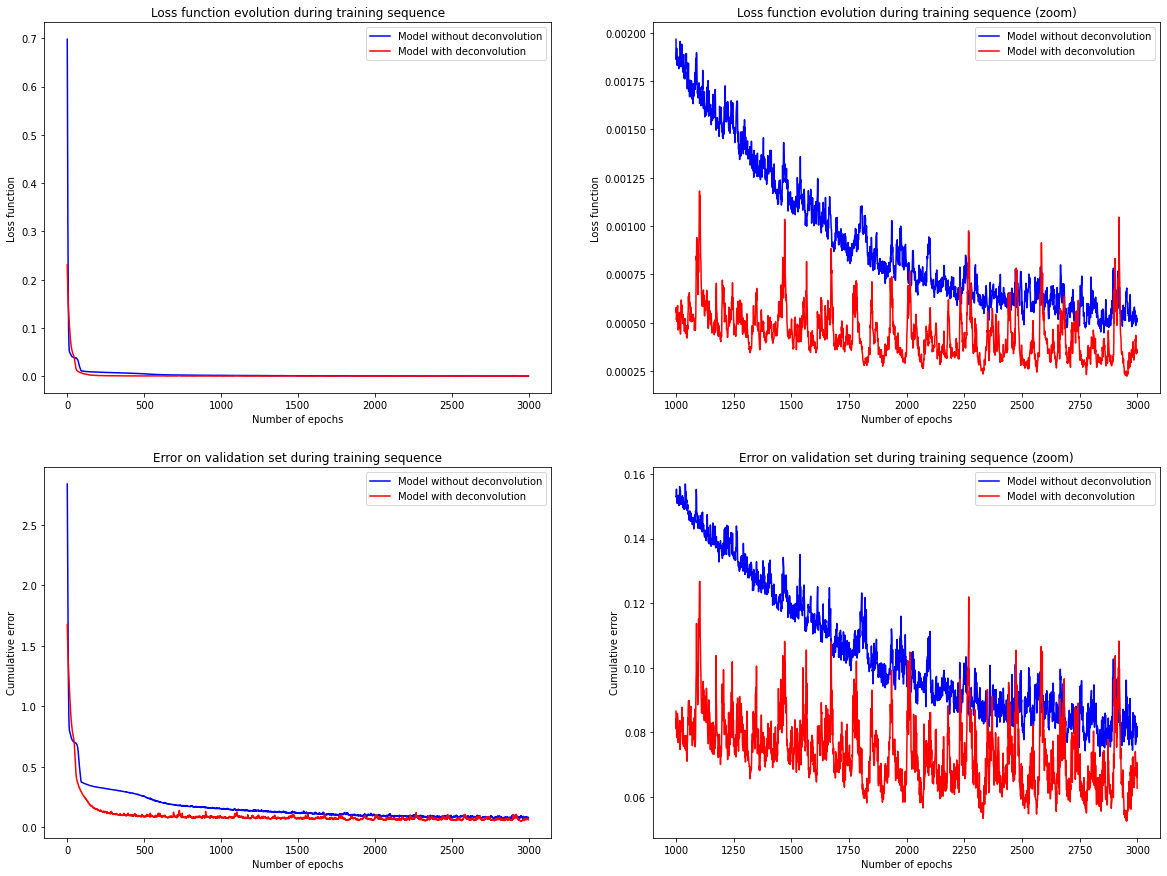

The FCLL model (without deconvolution) took 379.7305531 seconds to compute.
The model with deconvolution took 843.0913699 seconds to compute.


In [6]:
fig, axs = plt.subplots(2, 2,figsize=(20,15))
#fig= plt.figure(figsize=(40,6))

#Plot the loss function 
axs[0, 0].plot(Loss_1,'b')
axs[0, 0].plot(Loss_2,'r')
axs[0, 0].set_title('Loss function evolution during training sequence')
axs[0, 0].set_xlabel('Number of epochs')
axs[0, 0].set_ylabel('Loss function')
axs[0, 0].legend(('Model without deconvolution', 'Model with deconvolution'))

#Zooming
axs[0, 1].plot(range(1000,3000),Loss_1[1000:3000],'b')
axs[0, 1].plot(range(1000,3000),Loss_2[1000:3000],'r')
axs[0, 1].set_title('Loss function evolution during training sequence (zoom)')
axs[0, 1].set_xlabel('Number of epochs')
axs[0, 1].set_ylabel('Loss function')
axs[0, 1].legend(('Model without deconvolution', 'Model with deconvolution'))

#Plot the validation error
axs[1, 0].plot(Error_validation_1,'b')
axs[1, 0].plot(Error_validation_2,'r')
axs[1, 0].set_title('Error on validation set during training sequence')
axs[1, 0].set_xlabel('Number of epochs')
axs[1, 0].set_ylabel('Cumulative error')
axs[1, 0].legend(('Model without deconvolution', 'Model with deconvolution'))

#Zooming
axs[1, 1].plot(range(1000,3000),Error_validation_1[1000:3000],'b')
axs[1, 1].plot(range(1000,3000),Error_validation_2[1000:3000],'r')
axs[1, 1].set_title('Error on validation set during training sequence (zoom)')
axs[1, 1].set_xlabel('Number of epochs')
axs[1, 1].set_ylabel('Cumulative error')
axs[1, 1].legend(('Model without deconvolution', 'Model with deconvolution'))

plt.show()

print('The FCLL model (without deconvolution) took', time_1, 'seconds to compute.')
print('The model with deconvolution took', time_2, 'seconds to compute.')

# Plotting images of the vorticity field

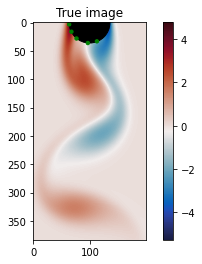

<Figure size 432x288 with 0 Axes>

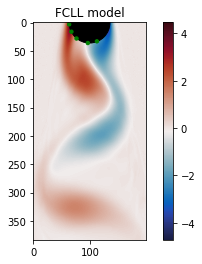

<Figure size 432x288 with 0 Axes>

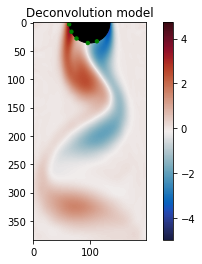

In [7]:
i=0 #index of the example to plot between 0 and 29

#Plotting true image
fig, ax1 = plt.subplots()
truth=plt.imshow(Data[i,:,:], cmap=colormap)
plt.colorbar(truth)
plt.title('True image')

#Plotting image predicted by the FCLL model
plt.figure()
fig,ax2=plt.subplots()
prediction_test=Model1.forward(Input_training[0:minibatch_size,:].squeeze())
prediction_test=prediction_test[i,: ].view(384,199).detach().numpy();
prediction_test=prediction_test*Norm.numpy();
FCLL=ax2.imshow(prediction_test, cmap=colormap);
plt.title('FCLL model')
plt.colorbar(FCLL, ax=ax2)

#Plotting image predicted by the deconvolution model
plt.figure()
fig,ax3=plt.subplots()      
prediction_test2=Model2.forward(Input_training[0:minibatch_size,:].squeeze())
prediction_test2=prediction_test2[i,: ].view(384,199).detach().numpy();
prediction_test2=prediction_test2*Norm.numpy();
Deconv=ax3.imshow(prediction_test2, cmap=colormap);
plt.title('Deconvolution model')
plt.colorbar(Deconv)

#Plotting cylinders
draw_cylinder=plt.Circle((99,0),36,color='k')
ax1.add_artist(draw_cylinder)
draw_cylinder2=plt.Circle((99,0),36,color='k')
ax2.add_artist(draw_cylinder2)
draw_cylinder3=plt.Circle((99,0),36,color='k')
ax3.add_artist(draw_cylinder3)

#Plotting sensors
for k in range(n_sensors):
    draw_sensor=plt.Circle((Sensors_coordinates[1][k],Sensors_coordinates[0][k]),3,color='g')
    ax1.add_artist(draw_sensor)
    draw_sensor2=plt.Circle((Sensors_coordinates[1][k],Sensors_coordinates[0][k]),3,color='g')
    ax2.add_artist(draw_sensor2)
    draw_sensor3=plt.Circle((Sensors_coordinates[1][k],Sensors_coordinates[0][k]),3,color='g')
    ax3.add_artist(draw_sensor3)
    

plt.show()